29860
5972
1647
13
326
5898


[21:36:20] WARNING: not removing hydrogen atom without neighbors
[21:36:20] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not removing hydrogen atom without neighbors
[21:36:21] WARNING: not r

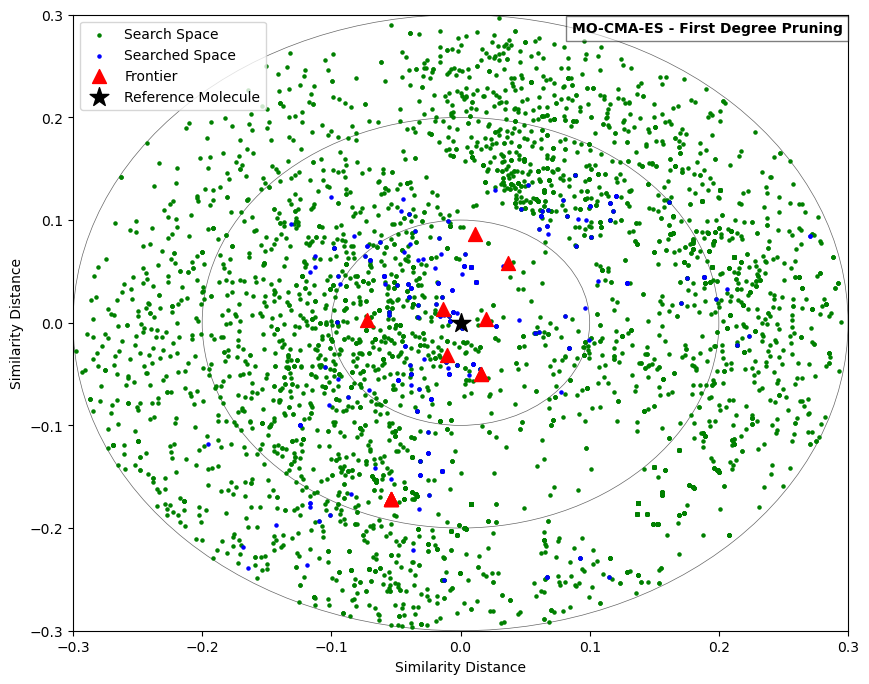

In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import DataStructs
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import random
from multiprocessing import Pool
import math
import pandas as pd
import glob
from matplotlib.patches import Circle

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
from matplotlib.path import Path
import matplotlib.patches as patches

# Set the seed for numpy's random number generator
np.random.seed(42)

# Initialize MDS with a fixed random state for reproducibility
mds = MDS(n_components=2, random_state=42)


def read_and_combine_csv(folder_path):
    # Get all CSV file paths from the folder
    csv_files = glob.glob(f"{folder_path}/*.csv")
    
    # List to hold dataframes
    df_list = []

    # Read each CSV file and append to the list
    for file in csv_files:
        df = pd.read_csv(file)
        df_list.append(df)

    # Combine all dataframes into a single dataframe
    combined_df = pd.concat(df_list, ignore_index=True)

    # Drop duplicates
    combined_df.drop_duplicates(inplace=True)

    return combined_df

# Example usage
folder_path = 'path/to/your/csv/files'



# Define the paths to the two folders

folder_path_1 = './resultscmaes/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/Progression/'
folder_path_2 = './resultsnsga/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/Progression/'

awecmaes = read_and_combine_csv(folder_path_1)

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    point1 (list or tuple): Coordinates of the first point.
    point2 (list or tuple): Coordinates of the second point.

    Returns:
    float: Euclidean distance between point1 and point2.
    """
    if len(point1) != len(point2):
        raise ValueError("Both points must have the same number of dimensions")

    # Calculating Euclidean distance
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))


# Function to compute Tanimoto similarity
def compute_similarity(fingerprint_pair):
    fp1, fp2 = fingerprint_pair
    return DataStructs.FingerprintSimilarity(fp1, fp2)

# Function to process and plot a set of molecules
def process_and_plot_molecules(smiles_list,lenfrontier, lensearched):
    valid_fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            valid_fingerprints.append(MACCSkeys.GenMACCSKeys(mol))

    # Compute similarities and distances
    num_molecules = len(valid_fingerprints)
    fingerprint_pairs = [(valid_fingerprints[i], valid_fingerprints[j]) 
                         for i in range(num_molecules) for j in range(num_molecules)]
    with Pool() as pool:
        similarities = pool.map(compute_similarity, fingerprint_pairs)
    distance_matrix = np.array(similarities).reshape(num_molecules, num_molecules)
    distance_matrix = 1 - distance_matrix

    # MDS for dimensionality reduction
    mds = MDS(n_components=2, dissimilarity='precomputed')
    coords = mds.fit_transform(distance_matrix)


    circle = Circle((0, 0), 0.1, color='black', fill=False, linewidth=0.5, alpha=0.6)
    plt.gca().add_patch(circle)

    circle = Circle((0, 0), 0.2, color='black', fill=False, linewidth=0.5, alpha=0.6)
    plt.gca().add_patch(circle)

    circle = Circle((0, 0), 0.3, color='black', fill=False, linewidth=0.5, alpha=0.6)
    plt.gca().add_patch(circle)

    # Plot
    c = 0
    tempx = coords[0][0]
    tempy = coords[0][1]

    for i, (x, y) in enumerate(coords):
        if i >= (1+5+lenfrontier+lensearched):
            x = x-tempx
            y = y-tempy
            if euclidean_distance((0,0),(x,y))<=0.3:
                plt.scatter(x, y, c="Green", marker="o", s=5, label="Search Space" if c == 0 else "")
                c+=1
    c = 0
    for i, (x, y) in enumerate(coords):
        if i >= (1+5+lenfrontier) and i< (1+5+lenfrontier+lensearched):
            x = x-tempx
            y = y-tempy
            if euclidean_distance((0,0),(x,y))<=0.3:
                plt.scatter(x, y, c="Blue", marker="o", s=5, label="Searched Space" if c == 0 else "")
                c+=1
    c = 0
    for i, (x, y) in enumerate(coords):
        if i >= (1+5) and i< (1+5+lenfrontier):
            x = x-tempx
            y = y-tempy
            plt.scatter(x, y, c="Red", marker="^", s=100, label="Frontier" if c == 0 else "")
            c+=1
    c = 0
    for i, (x, y) in enumerate(coords):
        if i >= (1) and i< (1+5):
            break
            x = x-tempx
            y = y-tempy
            plt.scatter(x, y, c="Gray", marker="*",edgecolors='black',linewidths=1.5 ,s=200, label="Starting Molecule" if c == 0 else "")
            c+=1
    c = 0
    for i, (x, y) in enumerate(coords):
        if i == (0) :
            x = x-tempx
            y = y-tempy
            plt.scatter(x, y, c="Black", marker="*", s=200, label="Reference Molecule" if c == 0 else "")
            c+=1
    
            

# Read the CSV file for initial molecules
df = pd.read_csv('../SearchSpace.csv')
smiles_list = df['SMILES'].tolist()

# Reference molecule
reference_smiles = 'CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O'
reference_mol = Chem.MolFromSmiles(reference_smiles)

reference_smiles_around = [
'CCCCCCCCOS(=O)(=O)[O-].CCCCCCCCOS(=O)(=O)[O-].[Cu+2]',
'CCC=CCC=CCC=CCCCCCCC(C)C(=O)S(=O)(=O)O',
'CCCCC(CC)COC(=O)C(C)S(=O)(=O)O',
'CCCCCCCCCCCCCOCCC(CC(=O)[O-])(C(=O)[O-])S(=O)(=O)O',
'CC(C)CCCCCCCCCCCCCCCC(C(C(C(C(CO)OS(=O)(=O)O)O)O)O)O'
]


# Select 10000 random molecules (excluding the reference molecule)
if reference_smiles in smiles_list:
    smiles_list.remove(reference_smiles)
print(len(smiles_list))
SearchSpace = random.sample(smiles_list, int(len(smiles_list)/5))
print(len(SearchSpace))
#SearchSpace.insert(0, reference_smiles)  # Include the reference molecule

# Read the CSV file for searched molecules
df_searched = awecmaes

searched_smiles_list = df_searched['SMILES'].tolist()
searched_smiles_list = list(set(searched_smiles_list))
print(len(searched_smiles_list))
searched_smiles_list = random.sample(searched_smiles_list, int(len(searched_smiles_list)/5))

#
frontier = pd.read_csv('./resultscmaes/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10_cleaned_final.csv')


#'./resultscmaes_around/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/CCC=CCC=CCC=CCCCCCCC(C)C(=O)S(=O)(=O)O_0.9_50_10_cleaned_final.csv'

#'./resultsnsga_around/CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O_0.9_50_10/CCC=CCC=CCC=CCCCCCCC(C)C(=O)S(=O)(=O)O_0.9_50_10_cleaned_final.csv'



frontier = frontier['SMILES'].tolist()

reference_smiles = ["CCCCCCC(C)CCCCCCCCCOS(=O)(=O)O"]

frontier = [item for item in frontier if item not in reference_smiles]
searched_smiles_list = [item for item in searched_smiles_list if item not in frontier]
SearchSpace = [item for item in SearchSpace if item not in frontier]
SearchSpace = [item for item in SearchSpace if item not in searched_smiles_list]

print(len(frontier))
print(len(searched_smiles_list))
print(len(SearchSpace))

plotlist = reference_smiles + reference_smiles_around +frontier + searched_smiles_list + SearchSpace 

# Main plotting
plt.figure(figsize=(10, 8))

# Process and plot the initial set of molecules
process_and_plot_molecules(plotlist, len(frontier), len(searched_smiles_list))

plt.xlim(-0.3,0.3)
plt.ylim(-0.3,0.3)

plt.text(0.993, 0.989, 'MO-CMA-ES - First Degree Pruning', fontweight='bold', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))


# Additional plot settings
plt.xlabel('Similarity Distance')
plt.ylabel('Similarity Distance')
#plt.title('CMAES First Degree Solution Space Visualization')
plt.legend(loc='upper left')
plt.show()


In [13]:
for i in range(20,5,-2):
    print(i,end = (', '))

20, 18, 16, 14, 12, 10, 8, 6, 